In [1]:
import os
import math
from tqdm import tqdm
import numpy as np
import nibabel as nib
from mayavi import mlab
from nilearn import plotting
import matplotlib.pyplot as plt
from intensity_normalization.normalize import gmm

In [2]:
def show_n4_bias(category,lim, slice=100):
    files = [each for each in os.listdir(os.path.join('compress', category)) if each.endswith('.gz')][:lim]
    cols = 8
    rows = math.ceil(len(files)/(cols/2))
    plt.figure(figsize=(cols*3, rows*2.8))
    plt.suptitle(f'N4-bias correction ({category})',fontsize=30)
    for n,file in enumerate(files):
        data = np.array(nib.load(os.path.join('compress',category, file)).dataobj)
        plt.subplot(rows,cols,n*2+1)
        plt.imshow(data[:,:,slice])
        plt.title('Original')
        plt.subplot(rows,cols,n*2+2)
        data = np.array(nib.load(os.path.join('n4_bias',category, file)).dataobj)
        plt.imshow(data[:,:,slice])
        plt.title('N4_bias')


In [3]:
def show_template_registration(category):
    files = [each for each in os.listdir(os.path.join('registration', category)) if each.endswith('.gz')][:1]
    col = 6
    row = math.ceil(len(files)/2)
    plt.figure(figsize=(cols*2, row*2.8))
    plt.suptitle(f'Template registration ({category})',fontsize=30)
    for n,file in enumerate(files):
        agent = nib.load(os.path.join('registration',category,file))
        data = np.array(agent.dataobj)
        plt.subplot(row,col,n*3+1)
        plt.imshow(np.rot90(data[:,:,91],1))
        plt.axis('off')
        plt.subplot(row,col,n*3+2)
        plt.imshow(np.rot90(data[:,108,:],1))
        plt.axis('off')
        plt.subplot(row,col,n*3+3)
        plt.imshow(np.rot90(data[93,:,:],1))
        plt.axis('off')
    plt.show()

In [4]:
categories = [each for each in os.listdir('registration') if '.' not in each]


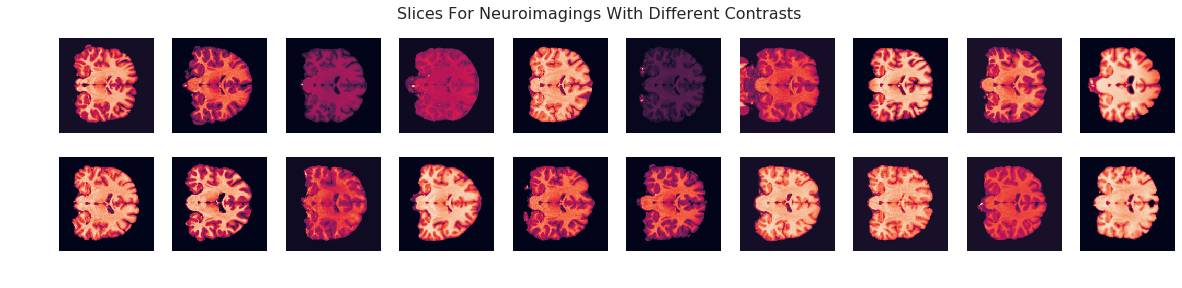

In [14]:
plt.figure(figsize=(20,4))
rows = 2
cols = len(categories) // rows
plt.suptitle('Slices For Neuroimagings From Different hospitals With Different Contrasts',fontsize=16)
for n,category in enumerate(categories):
    files = [each for each in os.listdir(os.path.join('registration', category)) if each.endswith('.gz')][:1]
    agent = nib.load(os.path.join('registration', category, files[0]))
    data = np.array(agent.dataobj)
    plt.subplot(rows, cols, n+1)
    plt.imshow(data[:,108,:])
    plt.axis('off')

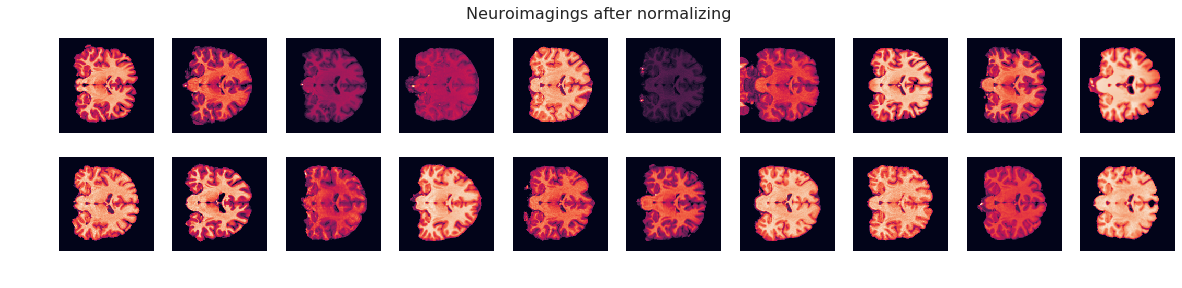

In [17]:
plt.figure(figsize=(20,4))
rows = 2
cols = len(categories) // rows
plt.suptitle('Neuroimagings after normalizing',fontsize=16)
for n,category in enumerate(categories):
    files = [each for each in os.listdir(os.path.join('registration', category)) if each.endswith('.gz')][:1]
    agent = nib.load(os.path.join('registration', category, files[0]))
    normalised = gmm.gmm_normalize(agent)
    data = np.array(normalised.dataobj)
    plt.subplot(rows, cols, n+1)
    plt.imshow(data[:,108,:])
    plt.axis('off')



0it [00:00, ?it/s]

1it [01:05, 65.49s/it]

2it [01:12, 47.91s/it]

3it [01:38, 41.37s/it]

4it [01:43, 30.39s/it]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


5it [01:56, 25.12s/it]

6it [02:22, 25.65s/it]

7it [03:15, 33.60s/it]

8it [03:20, 25.16s/it]

9it [03:24, 18.93s/it]

10it [03:30, 15.03s/it]

11it [03:39, 13.13s/it]

12it [03:47, 11.57s/it]

13it [04:02, 12.58s/it]

14it [04:11, 11.59s/it]

15it [04:19, 10.50s/it]

16it [04:25,  9.04s/it]

17it [07:02, 53.33s/it]

18it [07:06, 38.63s/it]

19it [07:16, 30.22s/it]

20it [07:22, 22.78s/it]



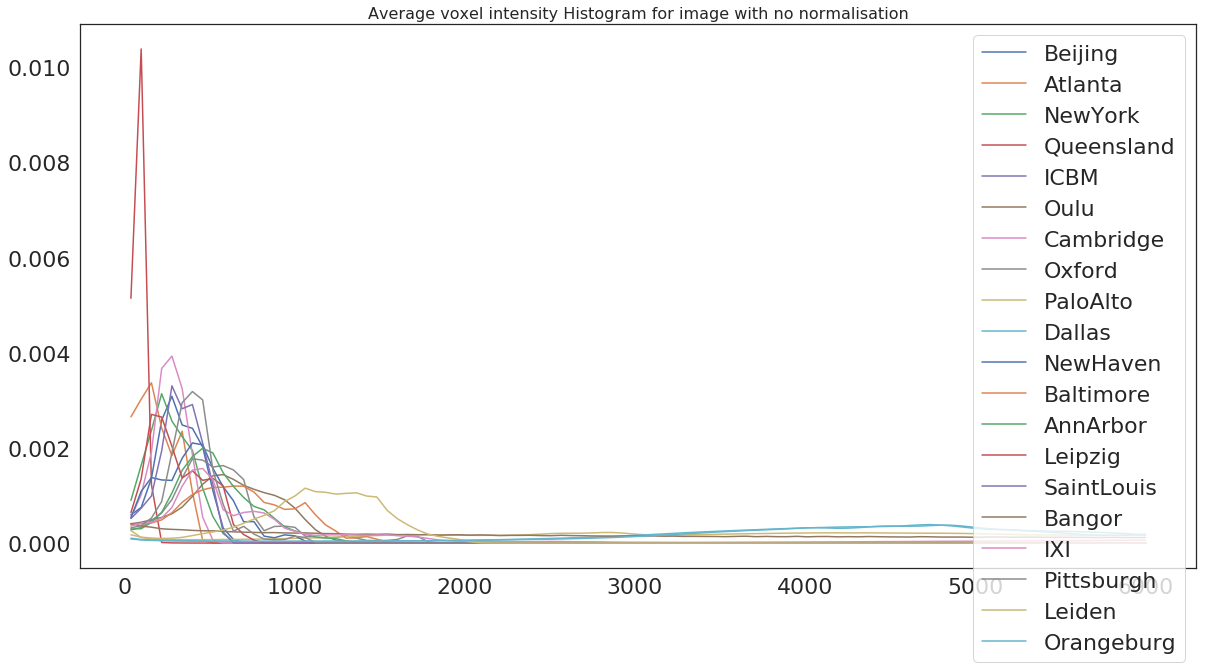

In [43]:
plt.figure(figsize=(20,10))
plt.title('Average voxel intensity Histogram for image with no normalisation',fontsize=16)
for n,category in tqdm(enumerate(categories)):
    files = [each for each in os.listdir(os.path.join('registration', category)) if each.endswith('.gz')]
    average_hist = np.zeros(100)
    max_data = 0
    for file in files:
        agent = nib.load(os.path.join('registration', category, file))
        data = np.array(agent.dataobj)
        if np.max(data) > max_data:
            max_data = np.max(data)
        histogram = np.histogram(data[(data>40)], density=True,bins=np.linspace(40, 6000,101))[0]
        average_hist += histogram
    category_value = average_hist/len(files)
    plt.plot(np.linspace(40,6000,100), category_value,label=category)
plt.legend()
    

In [44]:
category_value

array([1.01932519e-04, 7.60636012e-05, 6.51506227e-05, 5.89611059e-05,
       5.39446990e-05, 5.00659650e-05, 4.73822299e-05, 4.50027182e-05,
       4.33843600e-05, 4.15312785e-05, 4.03346462e-05, 3.92224236e-05,
       3.86628576e-05, 3.78734441e-05, 3.74725340e-05, 3.74057083e-05,
       3.80694089e-05, 3.87596793e-05, 3.93759014e-05, 4.04174761e-05,
       4.05783213e-05, 4.10669473e-05, 4.21476010e-05, 4.26925040e-05,
       4.33613576e-05, 4.46640585e-05, 4.52519032e-05, 4.64736983e-05,
       4.81083135e-05, 4.92180647e-05, 5.08381884e-05, 5.30279984e-05,
       5.47439472e-05, 5.70678379e-05, 6.00585094e-05, 6.27717553e-05,
       6.56927781e-05, 6.83999624e-05, 7.21336618e-05, 7.55600973e-05,
       7.87943564e-05, 8.28036078e-05, 8.70888854e-05, 9.20229253e-05,
       9.73220083e-05, 1.02793606e-04, 1.10197118e-04, 1.17480636e-04,
       1.26050607e-04, 1.35695113e-04, 1.46158346e-04, 1.56833949e-04,
       1.68795532e-04, 1.80735502e-04, 1.93666888e-04, 2.05796344e-04,
      

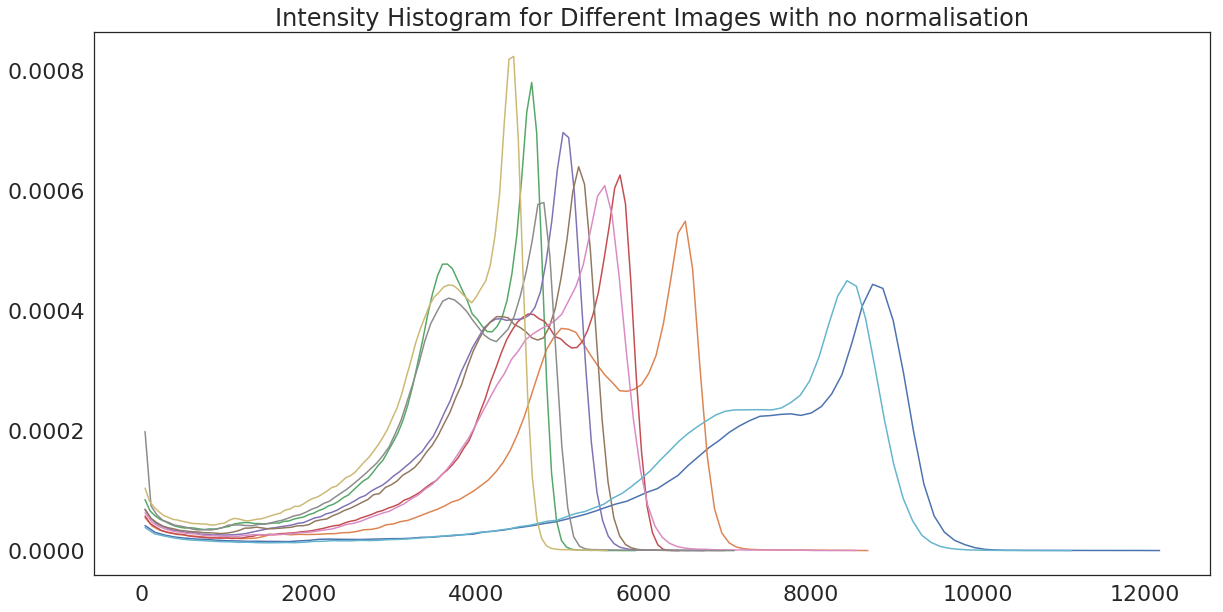

In [56]:
plt.figure(figsize=(20,10))
plt.title('Intensity Histogram for Different Images with no normalisation')
for file in files[:10]:
    agent = nib.load(os.path.join('registration', category, file))
    data = np.array(agent.dataobj)
    value ,grid = np.histogram(data[data>40], density=True,bins=100)
    plt.plot(grid[:-1], value)

In [4]:
agent = nib.load('MNI152_T1_1mm_brain.nii.gz')

In [6]:
plotting.plot_img(agent,output_file='output.png')